In [11]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use("dark_background")

df = pd.read_csv("_data/1_Fast_CrisisNLP_Twitter_Disaster/crisis_aggregated_preprocessed.csv")
df.head()

event                      source  \
0               disaster_events  drd-figureeight-multimedia   
1         2015_nepal_earthquake        crisisnlp-volunteers   
2    2014_california_earthquake                crisisnlp-cf   
3  2013_boston_bombings-ontopic                 crisislext6   
4          2014_pakistan_floods                crisisnlp-cf   

                                                text  \
0  Approximately 100km long firebreaks have been ...   
1           God bless you... https://t.co/AnEy1ydkkz   
2  RT @perreaux: Cracked wine casks, damaged hist...   
3  I'm really just excited for new undies and pin...   
4  Rescue effort expands in India, Pakistan as fl...   

                           class_label  group  \
0  infrastructure_and_utilities_damage  train   
1                     not_humanitarian  train   
2  infrastructure_and_utilities_damage  train   
3                     not_humanitarian  train   
4               injured_or_dead_people  train   

                                        cleaned_text  \
0  approximately km long firebreaks have been con...   
1                                      god bless you   
2  cracked wine casks damaged historical building...   
3  i m really just excited for new undies and pin...   
4  rescue effort expands in india pakistan as flo...   

                                     normalized_text  
0  approximately km long firebreak constructed in...  
1                                          god bless  
2  cracked wine cask damaged historical building ...  
3                really excited new undies pinkberry  
4  rescue effort expands india pakistan flood dea...

In [12]:
df = df.dropna()
X = df['normalized_text']
y = df['class_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Linear SVM

Classification Report:
                                     precision    recall  f1-score   support

                affected_individual       0.73      0.73      0.73       702
                 caution_and_advice       0.70      0.57      0.63       598
          displaced_and_evacuations       0.46      0.25      0.33       102
          donation_and_volunteering       0.71      0.71      0.71      1477
infrastructure_and_utilities_damage       0.68      0.58      0.63      1010
             injured_or_dead_people       0.78      0.74      0.76       555
           missing_and_found_people       0.53      0.32      0.40       106
                   not_humanitarian       0.87      0.94      0.90     10315
                  requests_or_needs       0.83      0.80      0.82      1380
                   response_efforts       0.44      0.09      0.15       223
               sympathy_and_support       0.74      0.59      0.65      1021

                           accuracy                

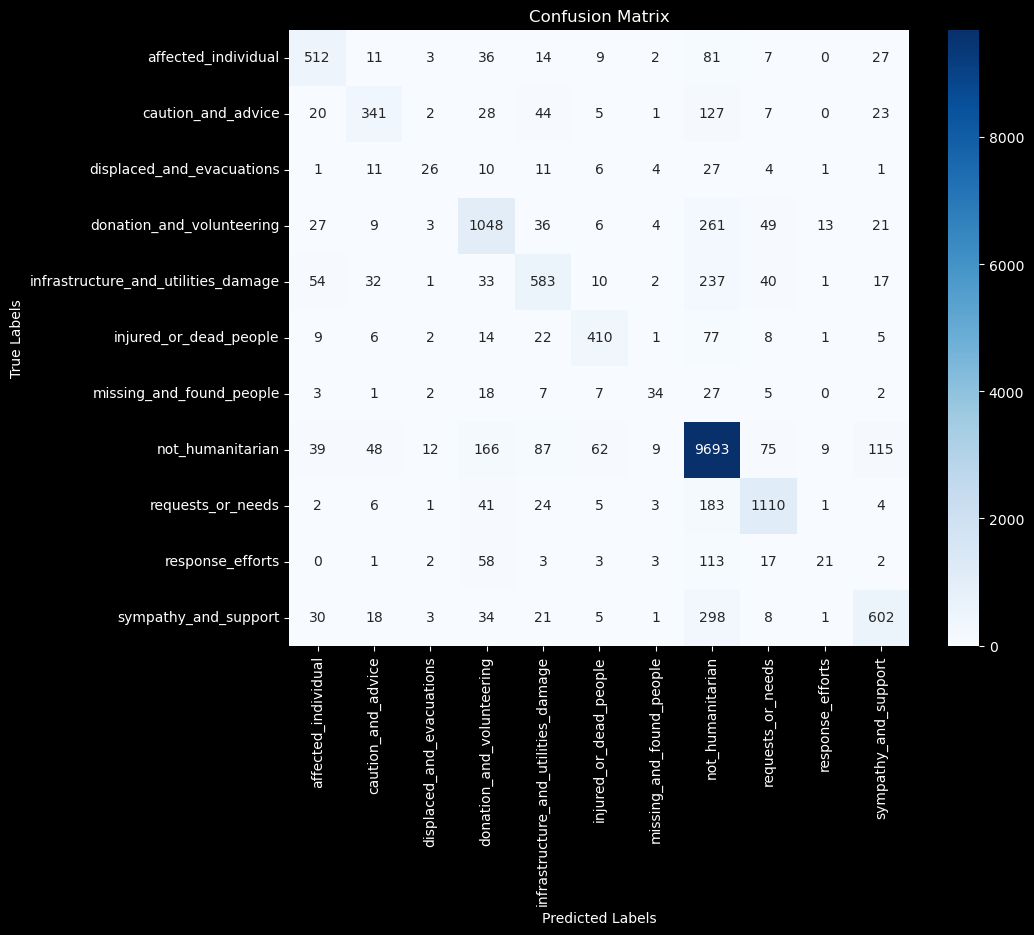

Top 20 features for affected_individual: guatemala, unaccounted, bangladesh, lax, italy, sardinia, rescueph, shooter, laxshooting, suspect, injuring, colorado, bopha, nightclub, survived, dead, survivor, sghaze, derailment, injures
Top 20 features for caution_and_advice: psi, tornado, warning, bigwet, bopha, nswfires, nate, siren, advisory, warn, declared, declares, pabloph, bushfire, instruction, alert, costa, jolt, sandy, nswrfs
Top 20 features for displaced_and_evacuations: evacuates, evacuation, evacuated, evacuate, evacuating, displaced, yemen, tourist, airlifted, flee, refuge, zealand, pakistani, shelter, evac, hurricaneodile, shifted, unsafe, rescued, evacuee
Top 20 features for donation_and_volunteering: reliefph, serbiafloods, fundraiser, kashmirflood, relief, aid, donation, donates, puerto, proceeds, donate, h_, help, vanuatu, volunteer, aiding, hurricaneharvey, helping, haiyan, rescuer
Top 20 features for infrastructure_and_utilities_damage: damage, infrastructure, damaged, 

In [13]:
# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM classifier
svm_classifier = LinearSVC(dual='auto')
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
categories = sorted(df['class_label'].unique())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Check most important features for each category
def get_top_features(vectorizer, classifier, category_names, n_top=20):
    feature_names = vectorizer.get_feature_names_out()

    # For OneVsRestClassifier, access estimators_ attribute
    if hasattr(classifier, 'estimators_'):
        estimators = classifier.estimators_
    else:
        # If it's a direct LinearSVC
        estimators = [classifier]

    for i, category in enumerate(category_names):
        if i < len(estimators):
            estimator = estimators[i]
            if hasattr(estimator, 'coef_'):
                top_indices = np.argsort(estimator.coef_[0])[-n_top:]
                top_features = [feature_names[j] for j in top_indices]
                print(f"Top {n_top} features for {category}: {', '.join(top_features[::-1])}")

from sklearn.multiclass import OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(LinearSVC(dual='auto'))
ovr_classifier.fit(X_train_tfidf, y_train)
get_top_features(tfidf_vectorizer, ovr_classifier, categories)

# Multinomial Naive Bayes

Naive Bayes Classification Report:
                                     precision    recall  f1-score   support

                affected_individual       0.76      0.62      0.68       702
                 caution_and_advice       0.76      0.42      0.54       598
          displaced_and_evacuations       0.00      0.00      0.00       102
          donation_and_volunteering       0.66      0.66      0.66      1477
infrastructure_and_utilities_damage       0.68      0.44      0.53      1010
             injured_or_dead_people       0.76      0.59      0.66       555
           missing_and_found_people       0.00      0.00      0.00       106
                   not_humanitarian       0.80      0.97      0.88     10315
                  requests_or_needs       0.88      0.71      0.79      1380
                   response_efforts       0.00      0.00      0.00       223
               sympathy_and_support       0.83      0.39      0.53      1021

                           accuracy    

c:\Users\andras.janko\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andras.janko\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andras.janko\AppData\Local\miniconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

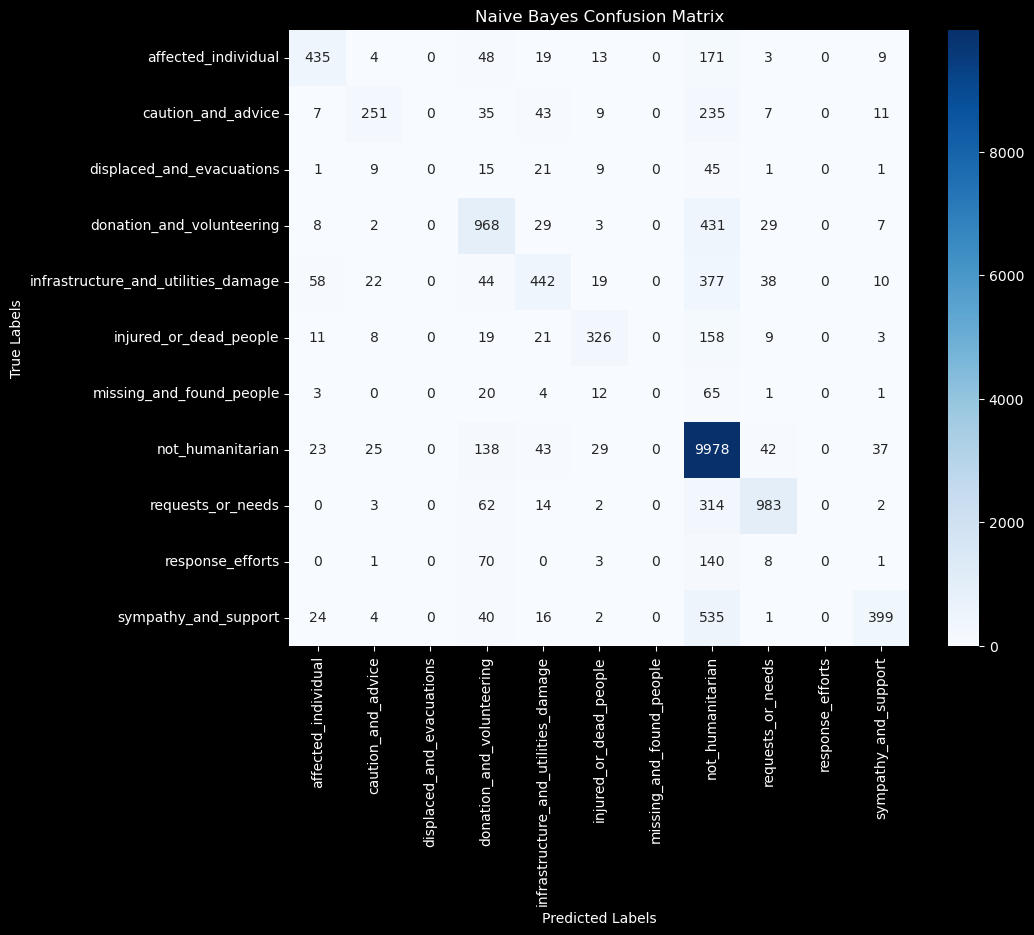


Comparison between SVM and Naive Bayes:
SVM Accuracy: 0.8222
Naive Bayes Accuracy: 0.7880


In [14]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Create and plot confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
categories = sorted(df['class_label'].unique())

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

print("\nComparison between SVM and Naive Bayes:")
from sklearn.metrics import accuracy_score
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")

# Random Forest

Random Forest Classification Report:
                                     precision    recall  f1-score   support

                affected_individual       0.77      0.66      0.71       702
                 caution_and_advice       0.72      0.50      0.59       598
          displaced_and_evacuations       0.75      0.12      0.20       102
          donation_and_volunteering       0.67      0.68      0.67      1477
infrastructure_and_utilities_damage       0.67      0.46      0.55      1010
             injured_or_dead_people       0.77      0.67      0.72       555
           missing_and_found_people       0.57      0.16      0.25       106
                   not_humanitarian       0.83      0.95      0.88     10315
                  requests_or_needs       0.81      0.71      0.76      1380
                   response_efforts       0.46      0.05      0.10       223
               sympathy_and_support       0.76      0.50      0.60      1021

                           accuracy  

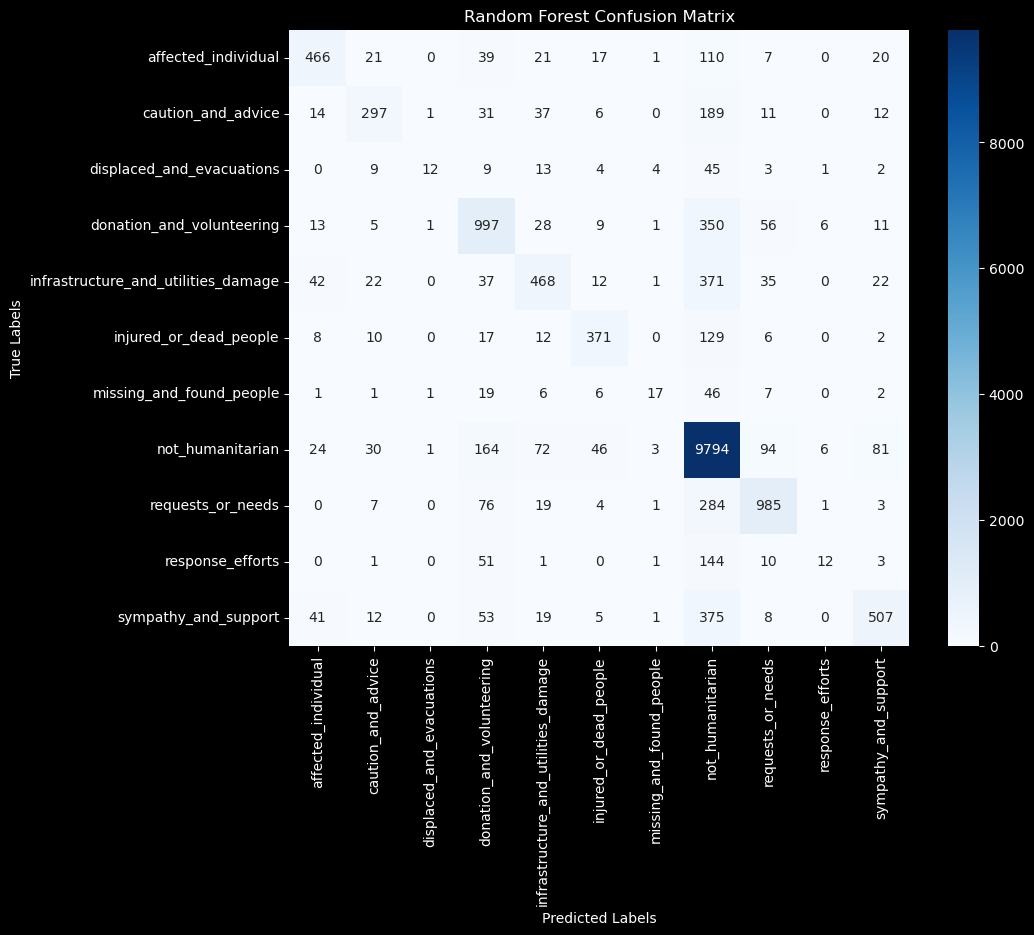


Model Comparison:
SVM Accuracy: 0.8222
Naive Bayes Accuracy: 0.7880
Random Forest Accuracy: 0.7963


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Compare all three models
from sklearn.metrics import accuracy_score
print("\nModel Comparison:")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Feature importance for random forest

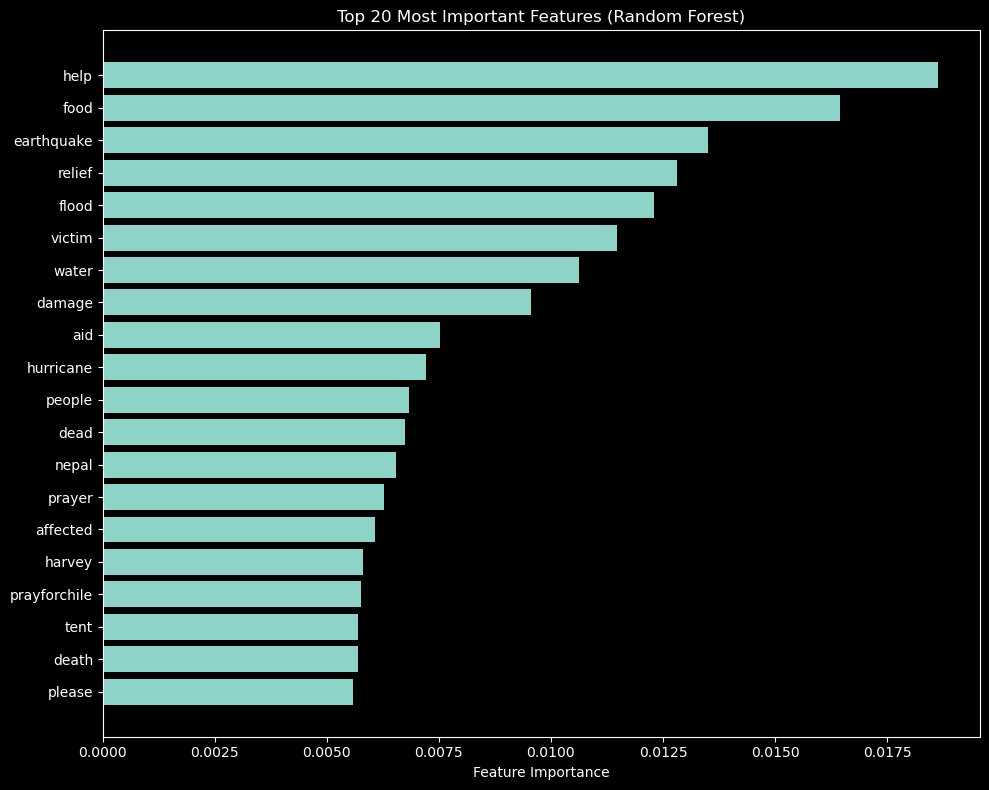

In [16]:
# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Plot top 20 most important features overall
feature_importances = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)[-20:]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features (Random Forest)')
plt.tight_layout()
plt.show()

# Coefficients from SVM Model

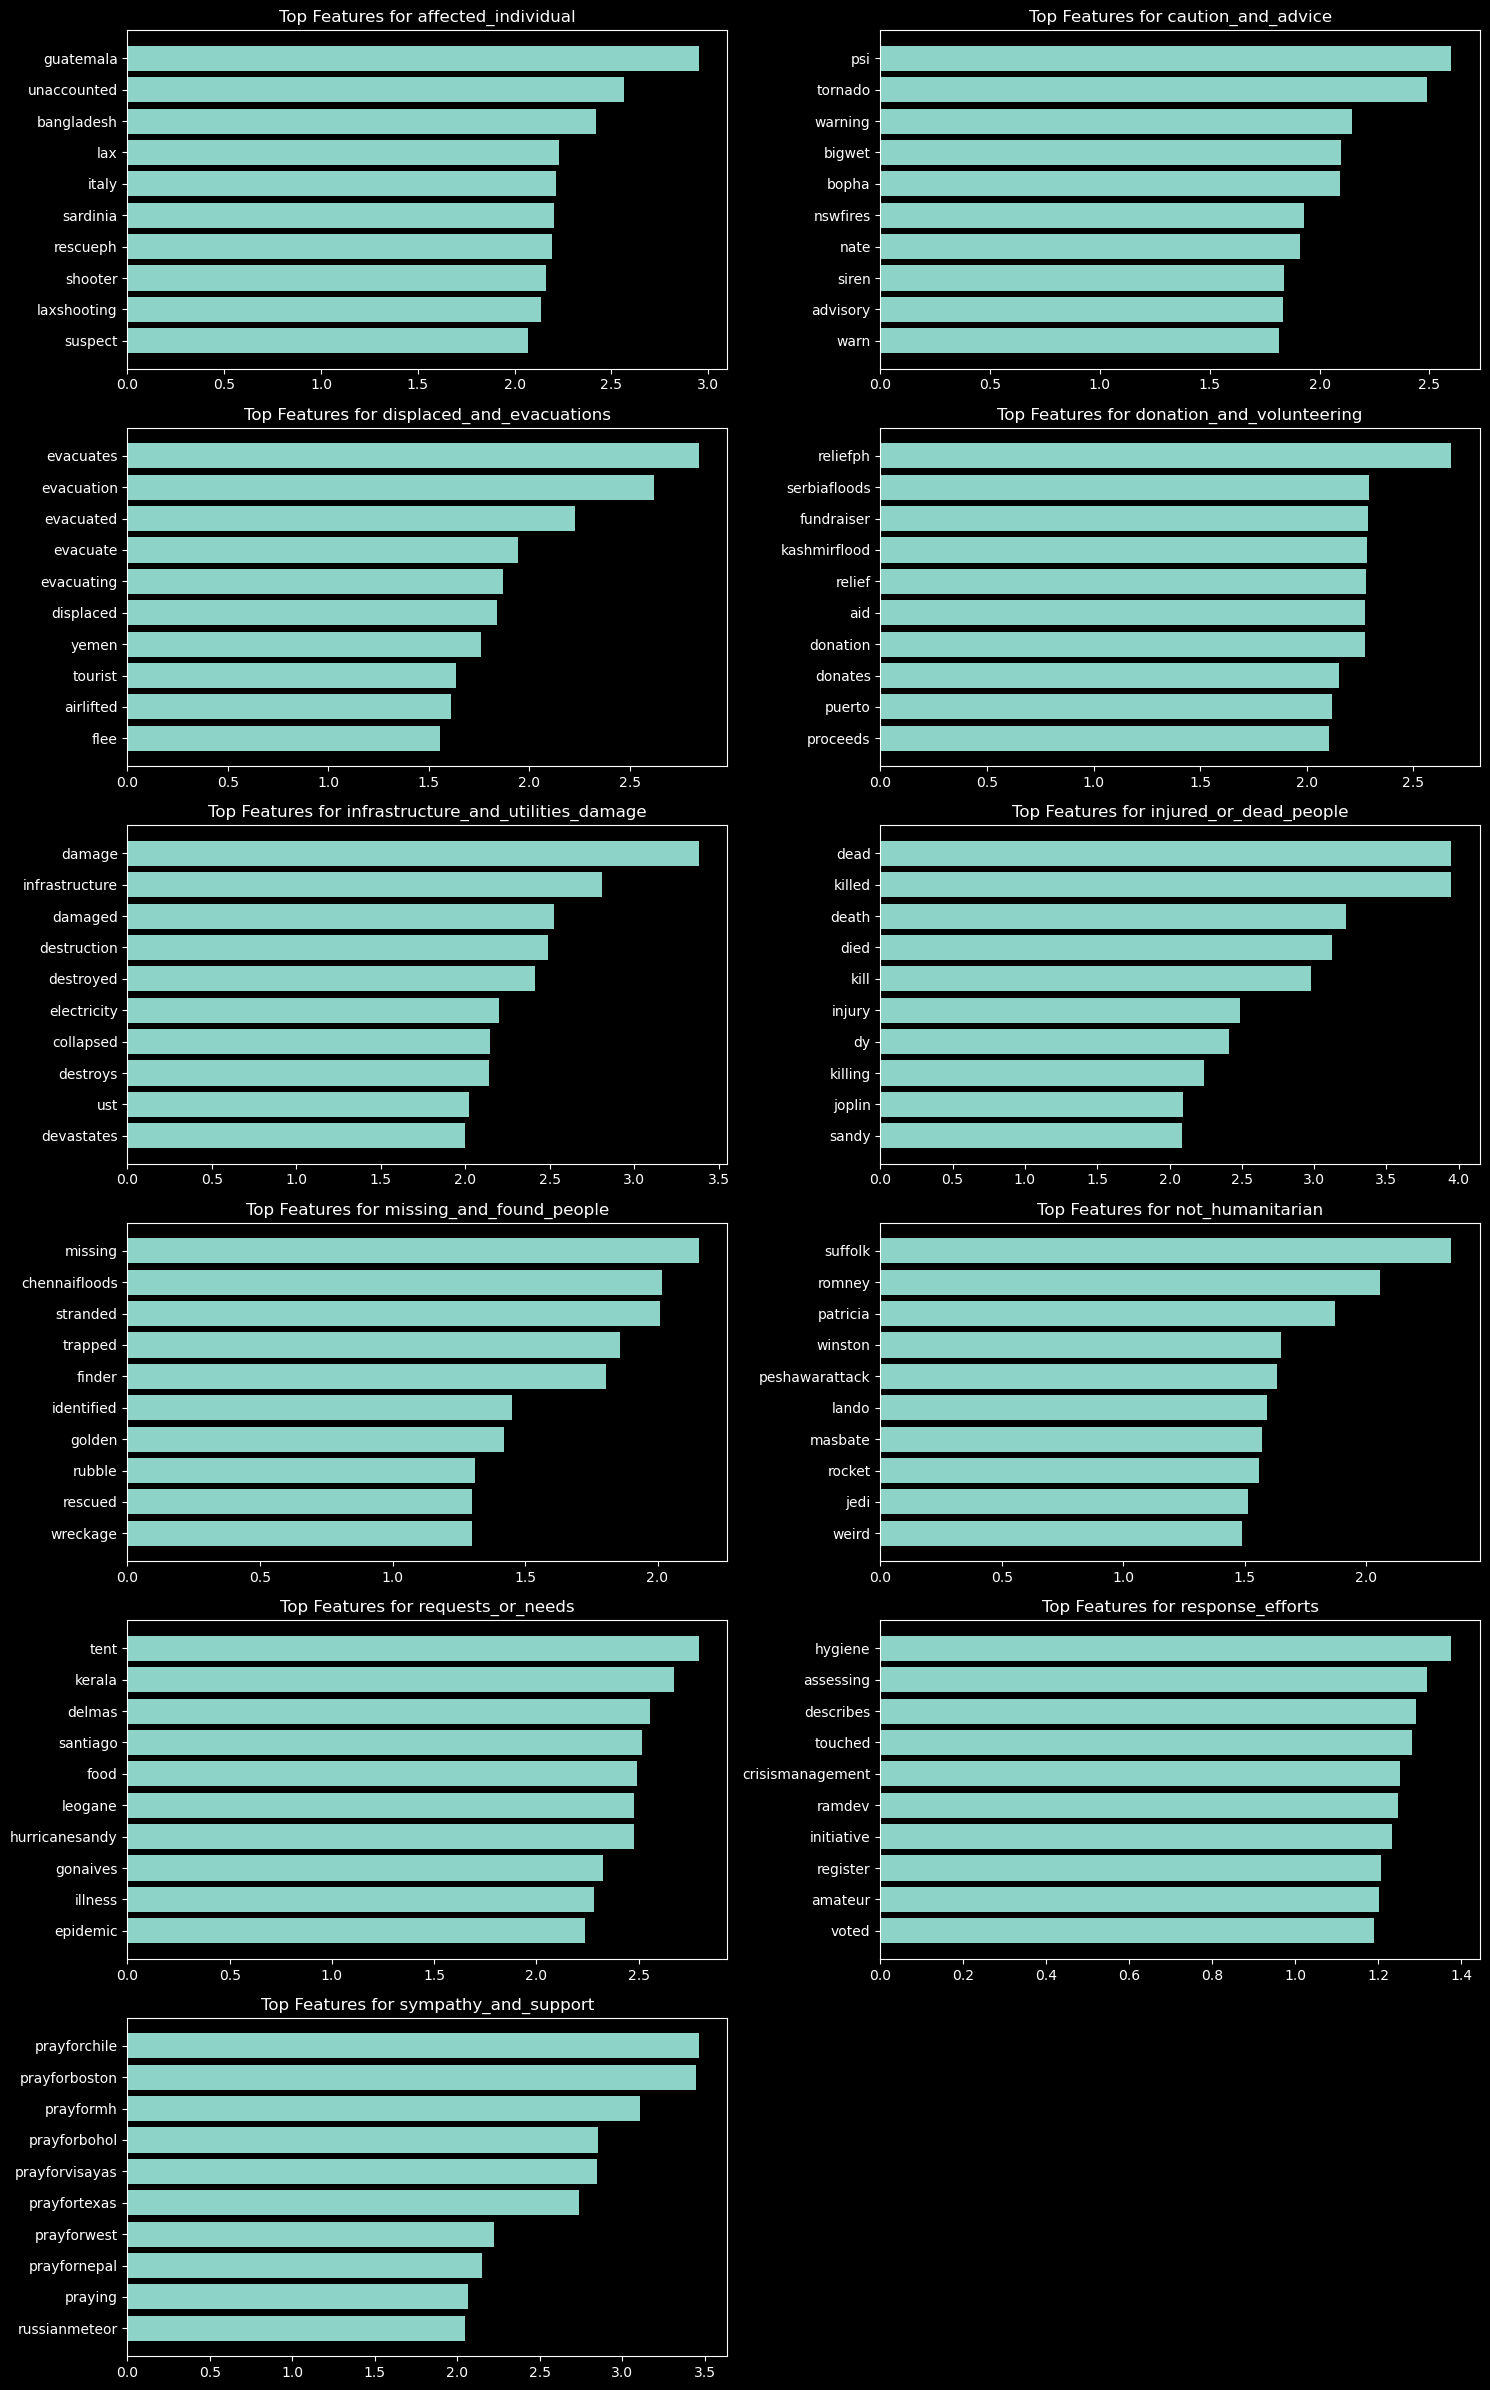

In [ ]:
# Get the top features for each category from SVM
def plot_top_features_per_category(classifier, feature_names, categories, top_n=10):
    # Calculate required grid size
    n_categories = len(categories)
    n_cols = 2
    n_rows = (n_categories + n_cols - 1) // n_cols  # Ceiling division to make sure we have enough rows

    plt.figure(figsize=(15, 4 * n_rows))

    for i, category in enumerate(categories):
        coefficients = classifier.coef_[i]
        top_indices = np.argsort(coefficients)[-top_n:]

        plt.subplot(n_rows, n_cols, i+1)
        plt.barh(range(top_n), coefficients[top_indices])
        plt.yticks(range(top_n), [feature_names[j] for j in top_indices])
        plt.title(f'Top Features for {category}')

    plt.tight_layout()
    plt.show()

# Make sure categories are in the same order as classifier's classes
categories = svm_classifier.classes_
plot_top_features_per_category(svm_classifier, feature_names, categories)

# Conditional Probabilities from Naive Bayes

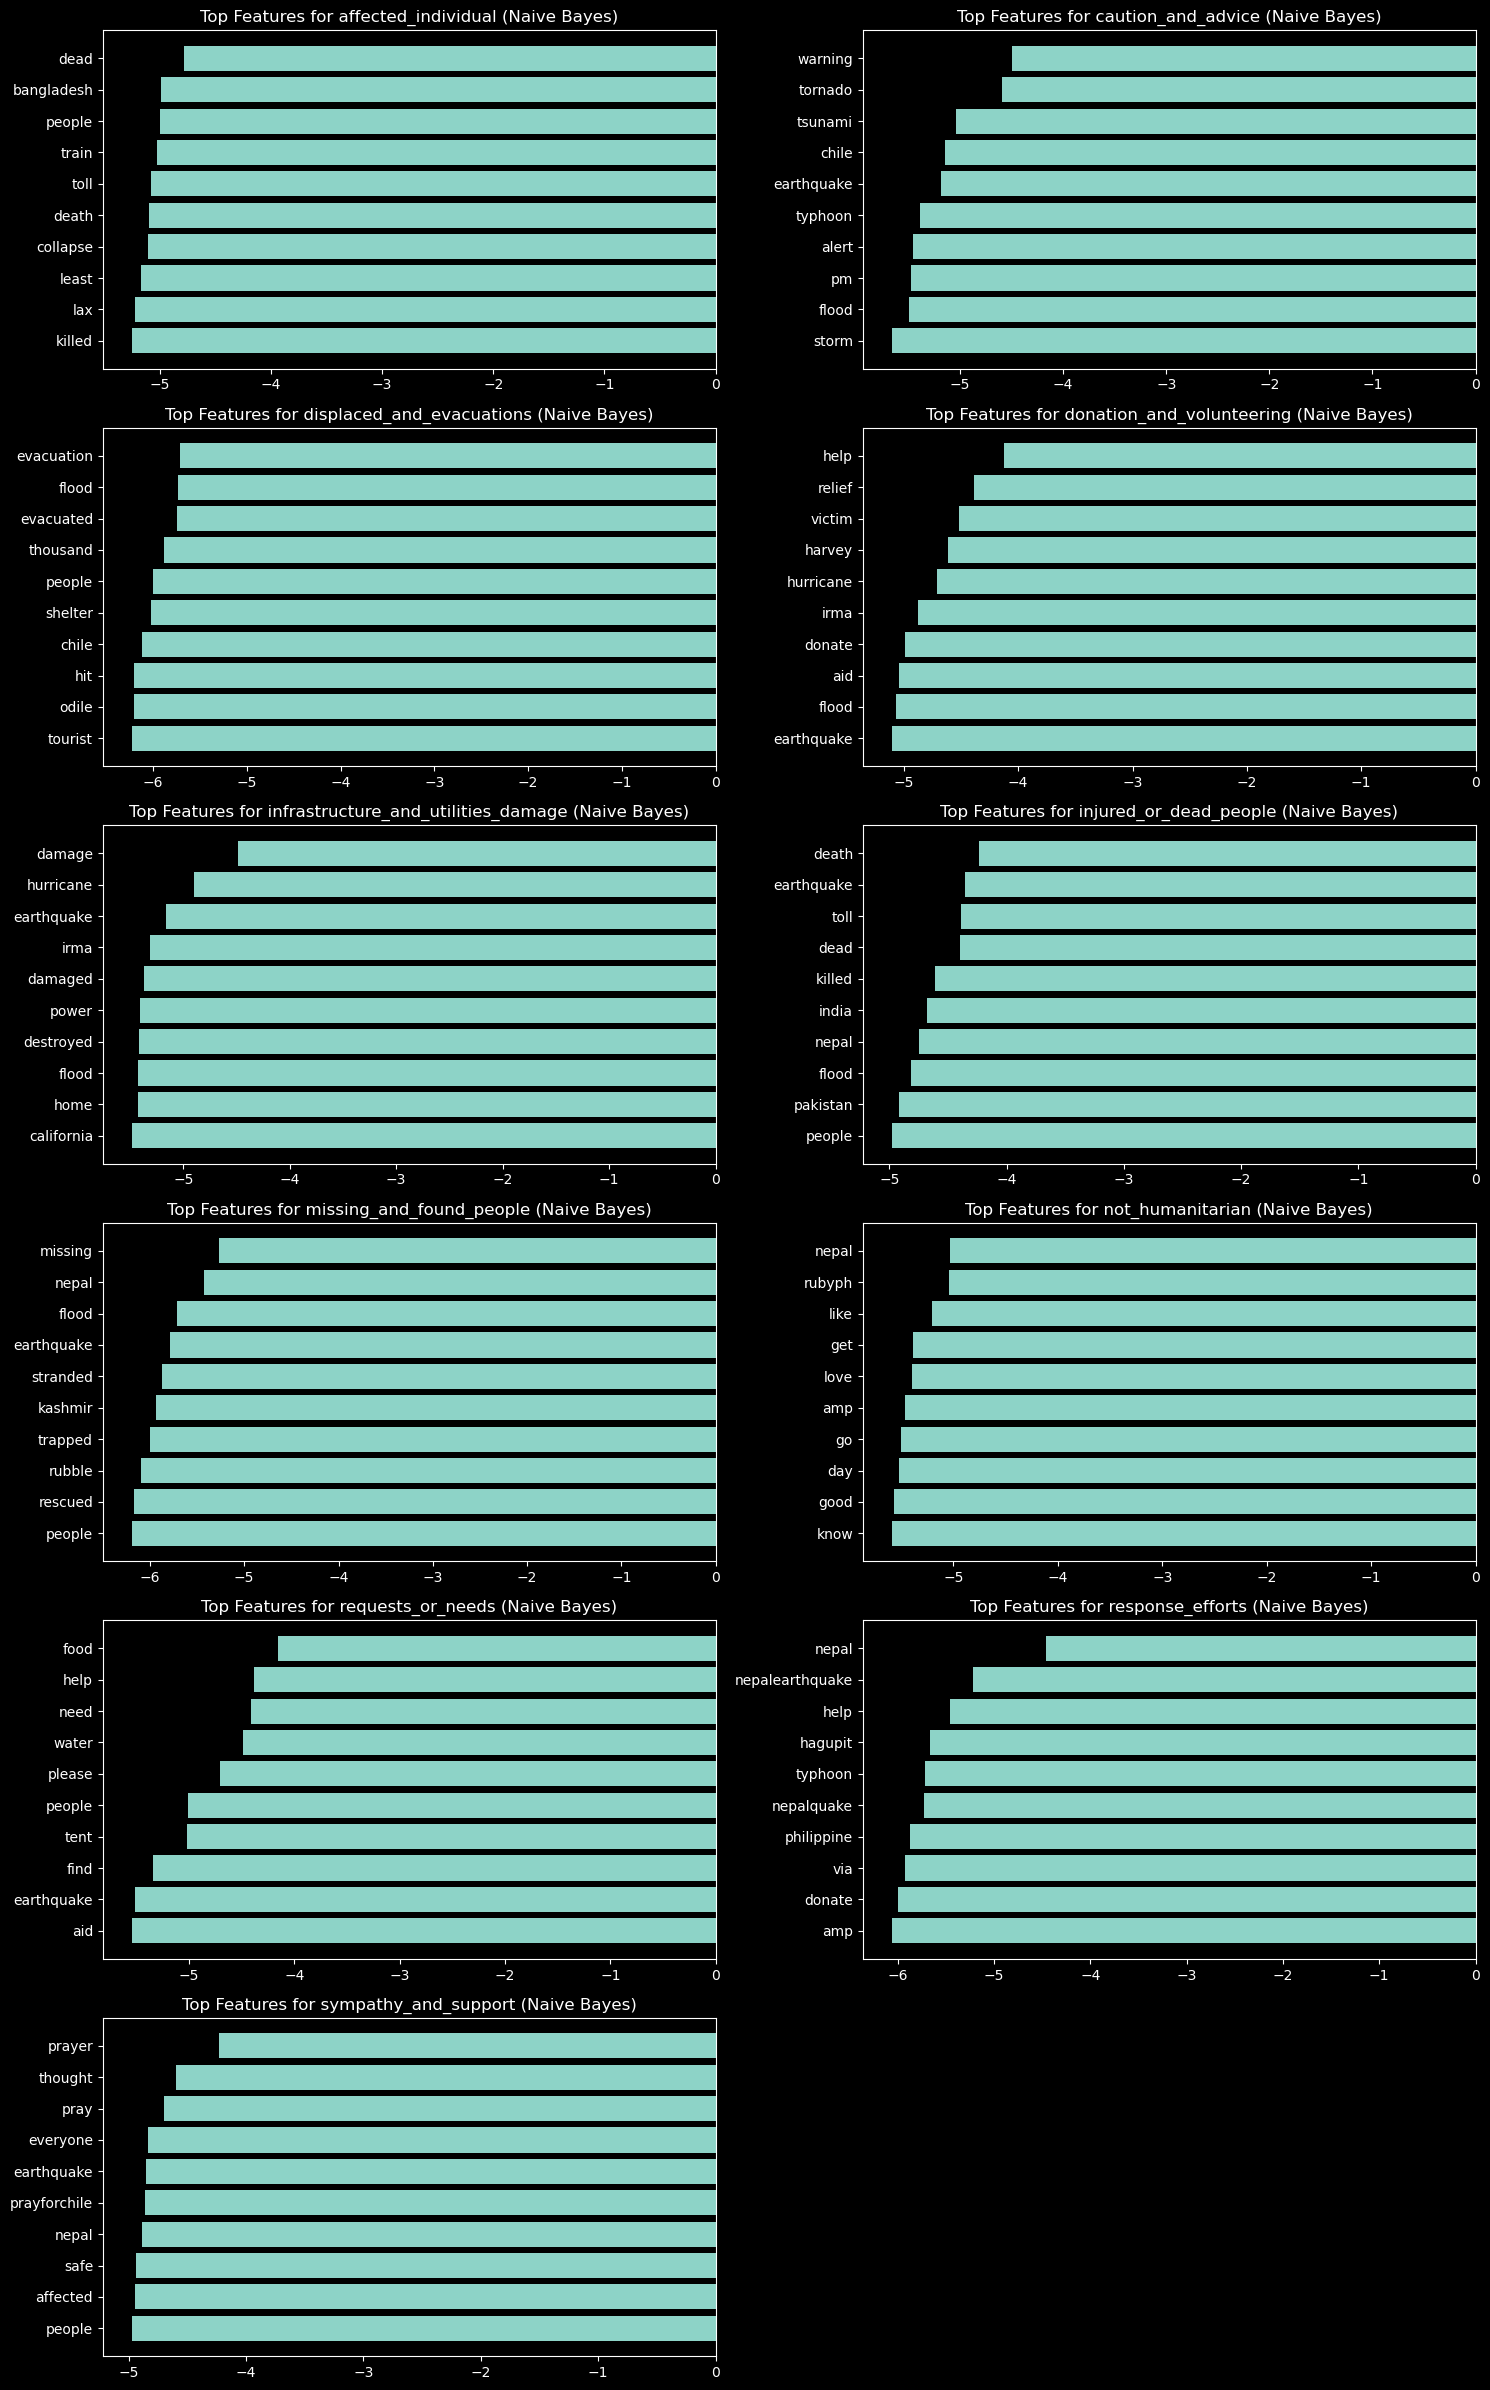

In [20]:
def plot_naive_bayes_features(nb_classifier, feature_names, categories, top_n=10):
    # Calculate required grid size
    n_categories = len(categories)
    n_cols = 2  # You can adjust this
    n_rows = (n_categories + n_cols - 1) // n_cols  # Ceiling division for enough rows

    plt.figure(figsize=(15, 4 * n_rows))
    feature_log_probs = nb_classifier.feature_log_prob_

    for i, category in enumerate(categories):
        # Get the log probabilities for this category
        log_probs = feature_log_probs[i]
        # Find indices of top features for this category
        top_indices = np.argsort(log_probs)[-top_n:]

        plt.subplot(n_rows, n_cols, i+1)
        plt.barh(range(top_n), log_probs[top_indices])
        plt.yticks(range(top_n), [feature_names[j] for j in top_indices])
        plt.title(f'Top Features for {category} (Naive Bayes)')

    plt.tight_layout()
    plt.show()

# Make sure categories are in the order of classifier's classes
categories = nb_classifier.classes_
plot_naive_bayes_features(nb_classifier, feature_names, categories)

# Word Clouds for Each Category

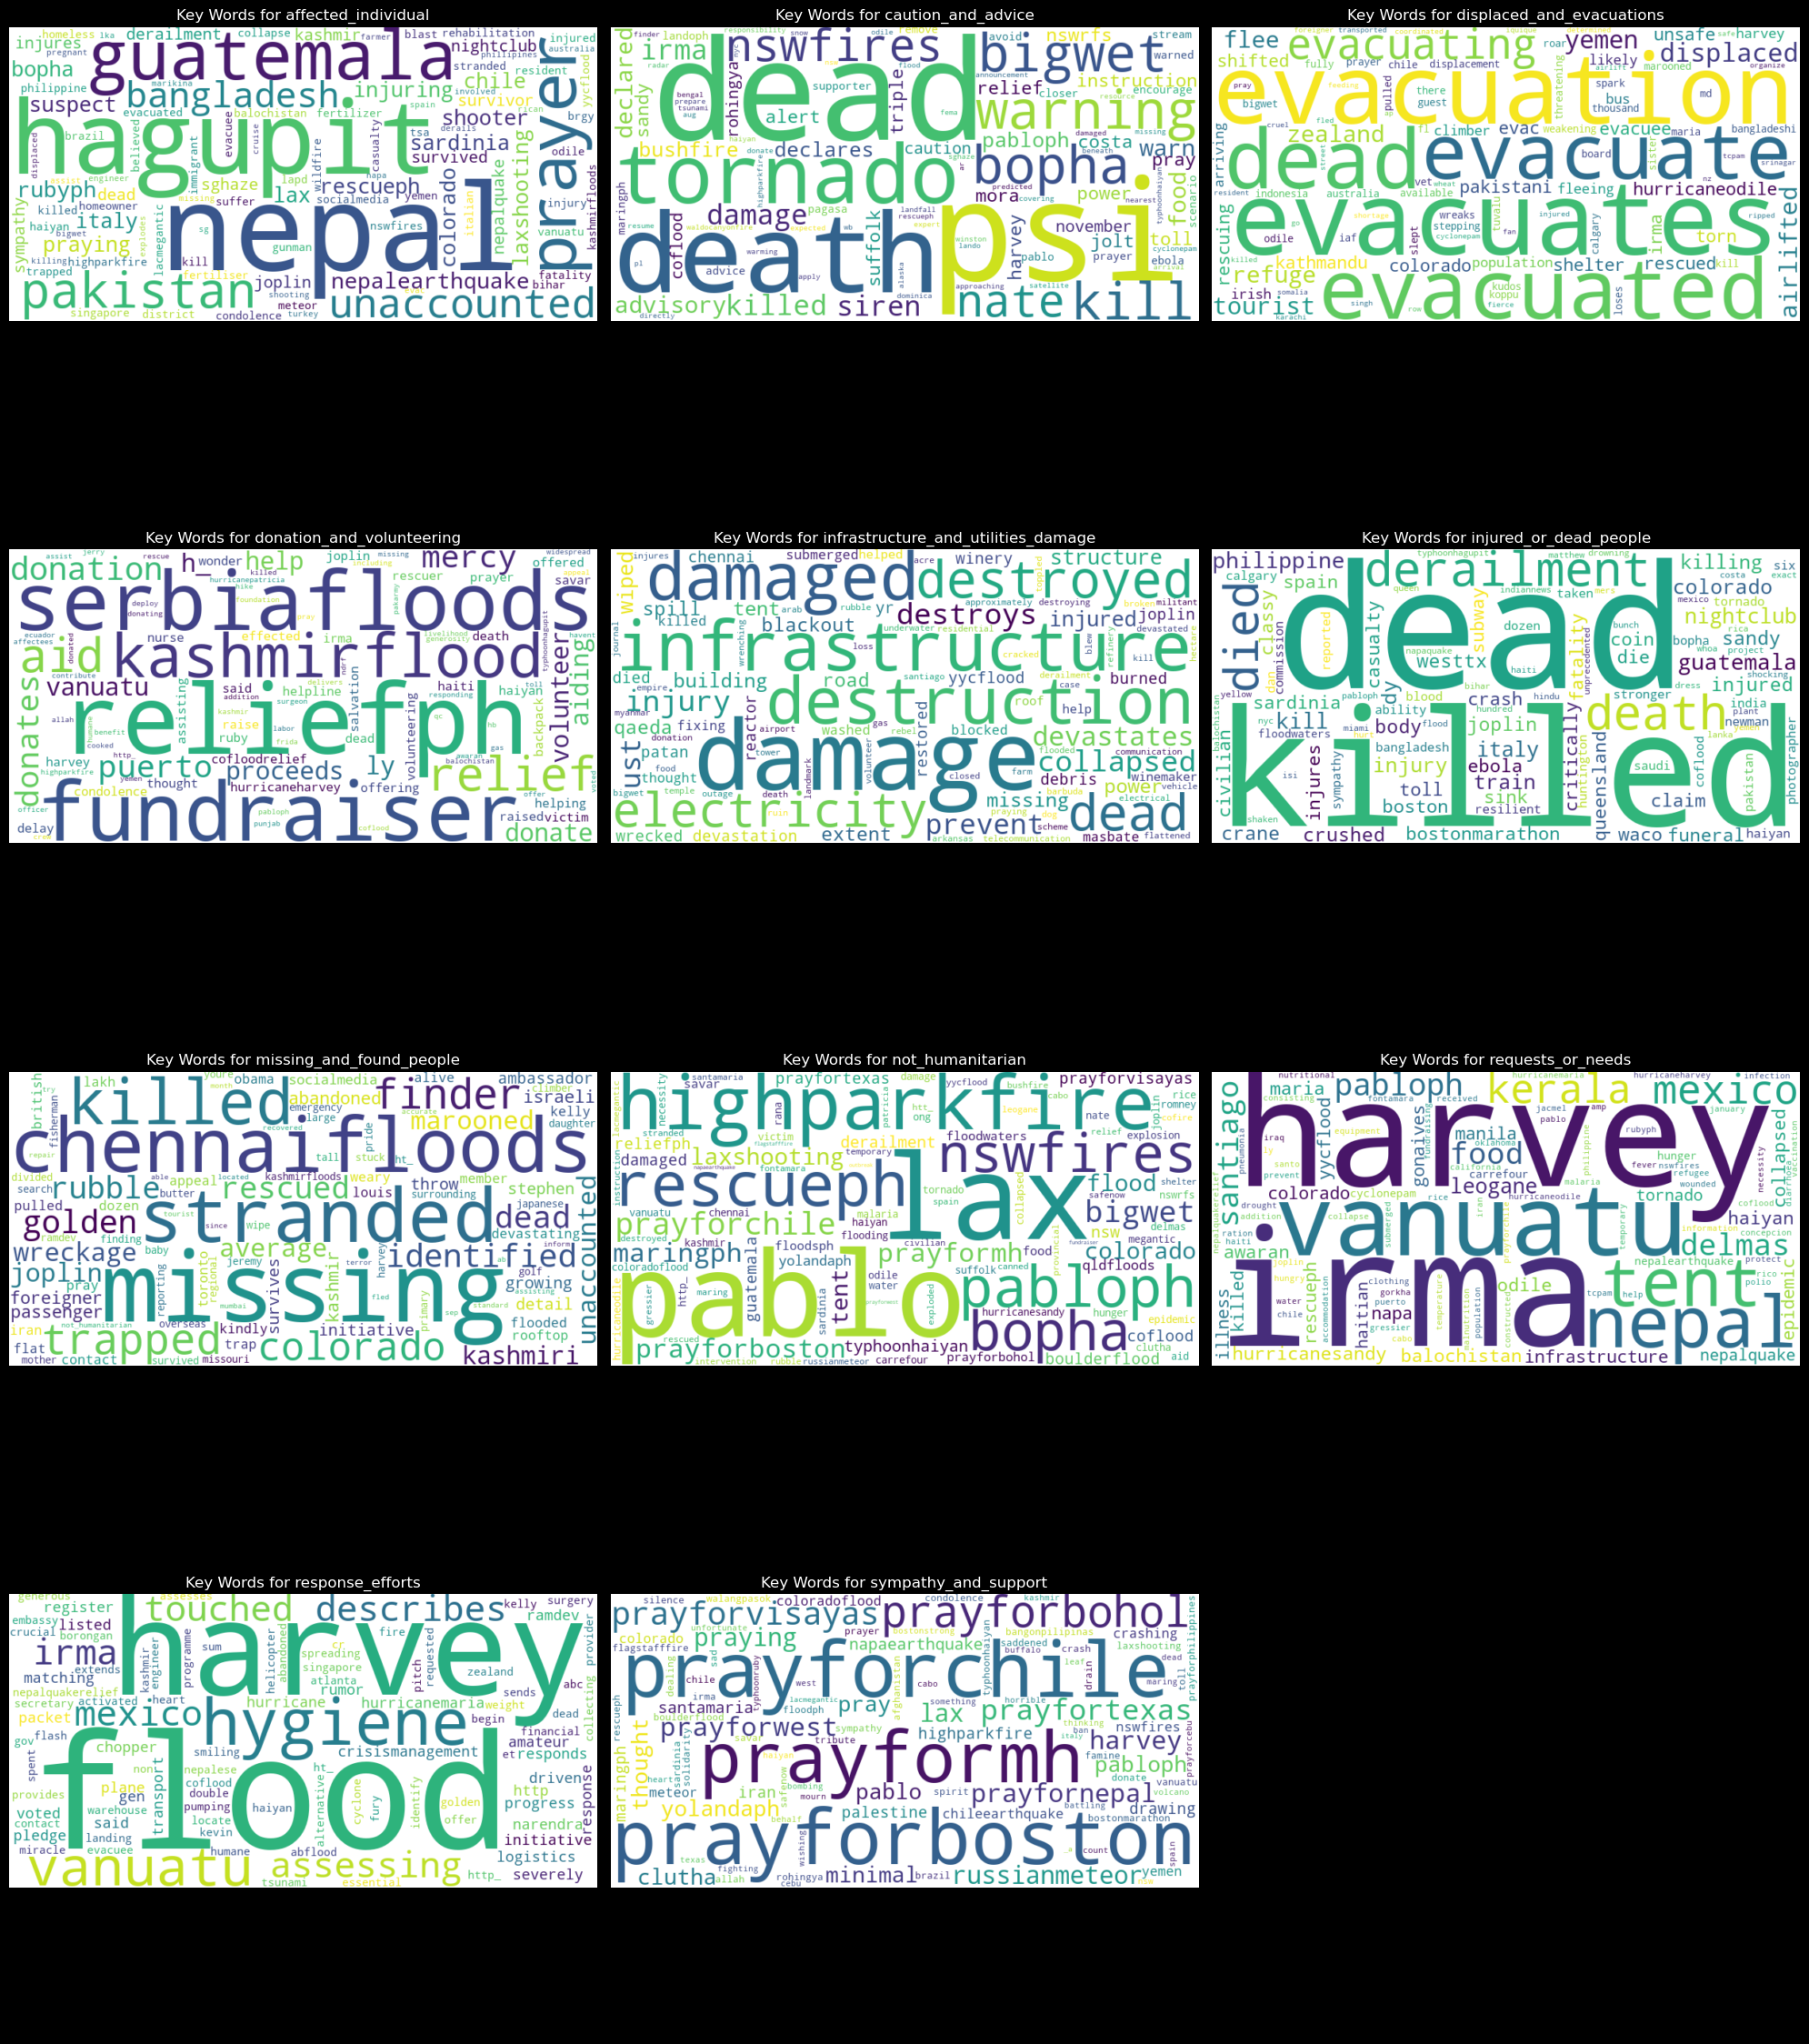

In [ ]:
from wordcloud import WordCloud

def plot_category_wordclouds(vectorizer, classifier, categories):
    feature_names = vectorizer.get_feature_names_out()

    # Calculate required grid size
    n_categories = len(categories)
    n_cols = 3  # You can adjust this
    n_rows = (n_categories + n_cols - 1) // n_cols  # Ceiling division for enough rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        if i < len(classifier.classes_):
            # Get the feature weights for this category
            if hasattr(classifier, 'coef_'):
                weights = classifier.coef_[i]
            elif hasattr(classifier, 'feature_importances_'):
                weights = classifier.feature_importances_
            else:
                continue

            # Create a dictionary of word:weight
            word_weights = {feature_names[j]: abs(weights[j]) for j in range(len(feature_names))}

            # Generate a word cloud
            wordcloud = WordCloud(width=800, height=400,
                                 background_color='white',
                                 max_words=100).generate_from_frequencies(word_weights)

            axes[i].imshow(wordcloud, interpolation='bilinear')
            axes[i].set_title(f'Key Words for {category}')
            axes[i].axis('off')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# For SVM
plot_category_wordclouds(tfidf_vectorizer, svm_classifier, svm_classifier.classes_)

# T-SNE Visualization of Document Vectors

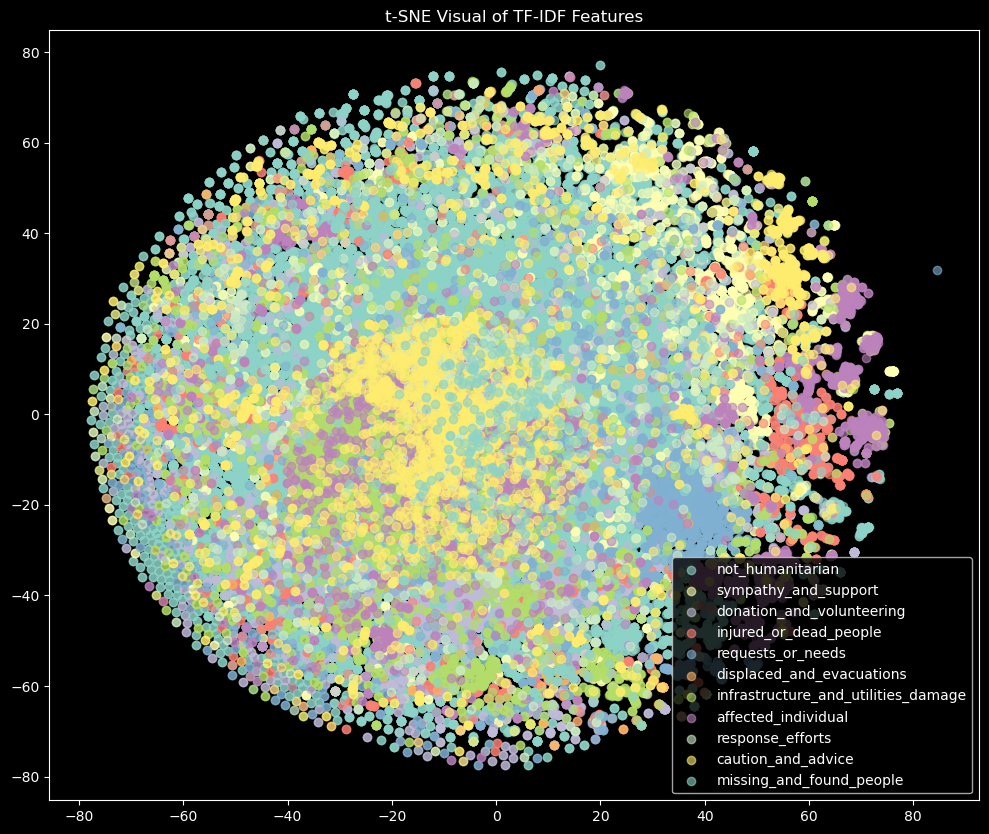

In [23]:
from sklearn.manifold import TSNE

# Create a t-SNE model to visualize the data in 2D
tsne = TSNE(n_components=2, random_state=42)

# Combine train and test data for visualization
X_combined = np.vstack([X_train_tfidf.toarray(), X_test_tfidf.toarray()])
y_combined = np.concatenate([y_train, y_test])

# Reduce the dimensionality
X_tsne = tsne.fit_transform(X_combined)

# Create a dataframe for plotting
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['class_label'] = y_combined

# Plot
plt.figure(figsize=(12, 10))
for category in tsne_df['class_label'].unique():
    subset = tsne_df[tsne_df['class_label'] == category]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=category, alpha=0.6)

plt.legend()
plt.title('t-SNE Visual of TF-IDF Features')
plt.show()